In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")


In [3]:
orders.head()

,order_id,product_id,customer_id,price,quantity,discount_percent,order_date,shipping_date,shipping_method,order_status,payment_mode
0,2437026,246316,52584,219.36,2,15,2024-03-25,2024-04-04,Express,Delivered,Cash on Delivery
1,9153566,131244,90151,236.00,5,20,2024-01-25,2024-01-31,Same-Day,Delivered,UPI
2,2161193,246316,69886,210.21,1,5,2024-06-17,2024-06-19,Same-Day,Delivered,UPI
3,9937326,133326,92660,241.40,2,10,2024-07-25,2024-08-01,Express,Delivered,Debit Card
4,3109911,877572,65372,87.72,1,20,2023-10-20,2023-10-28,Standard,Delivered,Net Banking


In [4]:
print("Orders table shape:", orders.shape)
print("Products table shape:", products.shape)


Orders table shape: (5000, 11)
Products table shape: (20, 9)


In [5]:
print("Orders columns:")
print(orders.columns)

print("\nProducts columns:")
print(products.columns)


Orders columns:
Index(['order_id', 'product_id', 'customer_id', 'price', 'quantity',
       'discount_percent', 'order_date', 'shipping_date', 'shipping_method',
       'order_status', 'payment_mode'],
      dtype='object')

Products columns:
Index(['product_id', 'product_name', 'product_category', 'manufacturing_city',
       'size', 'color', 'SKU', 'unit_cost', 'launch_year'],
      dtype='object')


In [6]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   product_id        5000 non-null   int64  
 2   customer_id       5000 non-null   int64  
 3   price             5000 non-null   float64
 4   quantity          5000 non-null   int64  
 5   discount_percent  5000 non-null   int64  
 6   order_date        5000 non-null   object 
 7   shipping_date     5000 non-null   object 
 8   shipping_method   5000 non-null   object 
 9   order_status      5000 non-null   object 
 10  payment_mode      5000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 429.8+ KB


In [7]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          20 non-null     int64  
 1   product_name        20 non-null     object 
 2   product_category    20 non-null     object 
 3   manufacturing_city  20 non-null     object 
 4   size                18 non-null     object 
 5   color               20 non-null     object 
 6   SKU                 20 non-null     int64  
 7   unit_cost           20 non-null     float64
 8   launch_year         20 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ KB


In [8]:
orders.describe()


,order_id,product_id,customer_id,price,quantity,discount_percent
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.534327e+06,422449.917400,54597.144000,134.954538,3.005000,10.136000
std,2.576519e+06,272173.872976,26262.014523,65.833061,1.401773,7.036434
min,1.001549e+06,131244.000000,10011.000000,20.010000,1.000000,0.000000
25%,3.289992e+06,198246.000000,31739.250000,78.355000,2.000000,5.000000
50%,5.562870e+06,329258.000000,54165.500000,134.335000,3.000000,10.000000
75%,7.753445e+06,770487.000000,77817.750000,191.740000,4.000000,15.000000
max,9.999133e+06,877572.000000,99981.000000,249.920000,5.000000,20.000000


In [9]:
products.describe()


,product_id,SKU,unit_cost,launch_year
count,20.000000,2.000000e+01,20.000000,20.000000
mean,449959.450000,5.540360e+07,47.045000,2022.250000
std,284482.564804,2.423210e+07,20.121872,2.197487
min,126225.000000,2.537487e+07,16.460000,2019.000000
25%,205166.250000,3.669493e+07,34.230000,2020.000000
50%,345420.000000,4.836552e+07,47.555000,2022.500000
75%,732003.750000,6.725144e+07,60.452500,2024.000000
max,877572.000000,9.797149e+07,79.800000,2025.000000


In [10]:
orders["order_id"].nunique(), orders.shape[0]


(5000, 5000)

In [11]:
products["product_id"].nunique(), products.shape[0]


(20, 20)

In [12]:
invalid_products = orders[~orders["product_id"].isin(products["product_id"])]
invalid_products.shape


(0, 11)

In [13]:
orders["order_date"] = pd.to_datetime(orders["order_date"])
orders["shipping_date"] = pd.to_datetime(orders["shipping_date"])


In [14]:
orders["revenue"] = orders["price"] * orders["quantity"]


In [15]:
orders["delivery_days"] = (orders["shipping_date"] - orders["order_date"]).dt.days


In [16]:
orders[orders["delivery_days"] < 0]


,order_id,product_id,customer_id,price,quantity,discount_percent,order_date,shipping_date,shipping_method,order_status,payment_mode,revenue,delivery_days


In [17]:
df = orders.merge(products, on="product_id", how="left")


In [18]:
df.head()


,order_id,product_id,customer_id,price,quantity,discount_percent,order_date,shipping_date,shipping_method,order_status,...,revenue,delivery_days,product_name,product_category,manufacturing_city,size,color,SKU,unit_cost,launch_year
0,2437026,246316,52584,219.36,2,15,2024-03-25,2024-04-04,Express,Delivered,...,438.72,10,Product_8,Fitness Equipment,Hyderabad,L,White,59684848,31.65,2024
1,9153566,131244,90151,236.00,5,20,2024-01-25,2024-01-31,Same-Day,Delivered,...,1180.00,6,Product_18,Electronics,Hyderabad,L,Black,49392920,37.61,2022
2,2161193,246316,69886,210.21,1,5,2024-06-17,2024-06-19,Same-Day,Delivered,...,210.21,2,Product_8,Fitness Equipment,Hyderabad,L,White,59684848,31.65,2024
3,9937326,133326,92660,241.40,2,10,2024-07-25,2024-08-01,Express,Delivered,...,482.80,7,Product_17,Sportswear,Pune,S,Grey,25374874,56.13,2023
4,3109911,877572,65372,87.72,1,20,2023-10-20,2023-10-28,Standard,Delivered,...,87.72,8,Product_4,Health Supplements,Delhi,XL,Black,58181396,68.56,2023


In [19]:
df.isnull().sum()


order_id                0
product_id              0
customer_id             0
price                   0
quantity                0
discount_percent        0
order_date              0
shipping_date           0
shipping_method         0
order_status            0
payment_mode            0
revenue                 0
delivery_days           0
product_name            0
product_category        0
manufacturing_city      0
size                  666
color                   0
SKU                     0
unit_cost               0
launch_year             0
dtype: int64

In [20]:
total_revenue = df["revenue"].sum()
total_orders = df["order_id"].nunique()
avg_order_value = total_revenue / total_orders

total_revenue, total_orders, avg_order_value


(np.float64(2032508.2699999998), 5000, np.float64(406.501654))

In [21]:
category_revenue = (
    df.groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

category_revenue

product_category
Fitness Equipment     977761.51
Sportswear            655832.45
Electronics           270221.92
Health Supplements    128692.39
Name: revenue, dtype: float64

In [22]:
top_products = (
    df.groupby("product_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


product_name
Product_14    164910.39
Product_19    152484.07
Product_9     147776.19
Product_6     144764.82
Product_5     140396.46
Name: revenue, dtype: float64

Which product categories generate the most revenue?

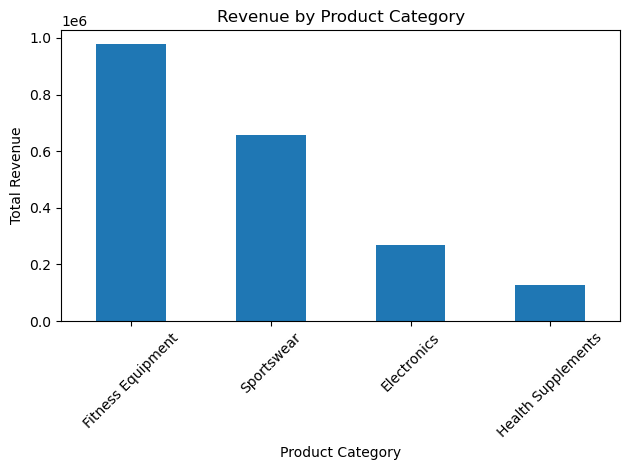

In [23]:
import matplotlib.pyplot as plt

category_revenue.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Which products should the business prioritize?

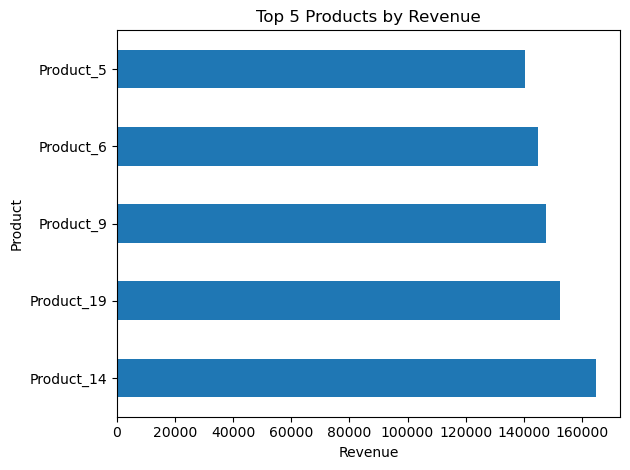

In [24]:
top_products.plot(kind="barh")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


Is the business growing over time?

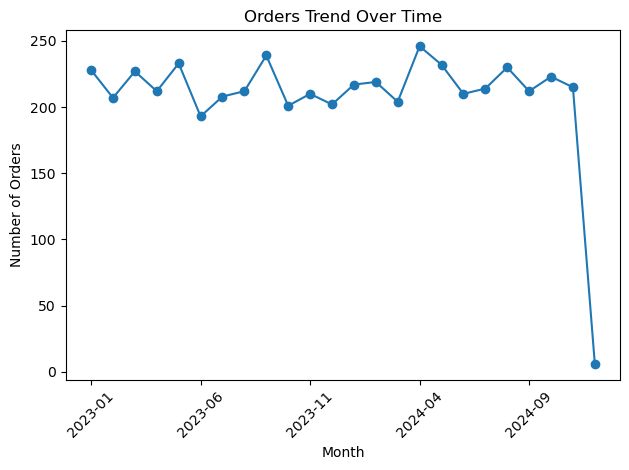

In [25]:
orders_over_time = df.groupby(df["order_date"].dt.to_period("M"))["order_id"].count()
orders_over_time.index = orders_over_time.index.astype(str)

orders_over_time.plot(kind="line", marker="o")
plt.title("Orders Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How efficient is the delivery process?

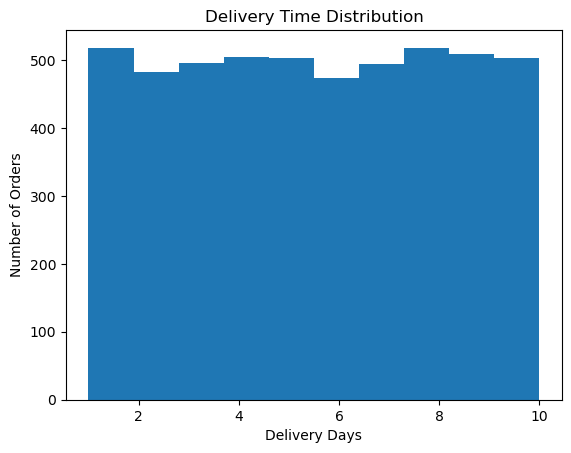

In [26]:
df["delivery_days"].plot(kind="hist", bins=10)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Number of Orders")
plt.show()


Which shipping method generates the highest revenue?

In [27]:
shipping_revenue = (
    df.groupby("shipping_method")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

shipping_revenue


shipping_method
Same-Day    693875.61
Express     681346.65
Standard    657286.01
Name: revenue, dtype: float64

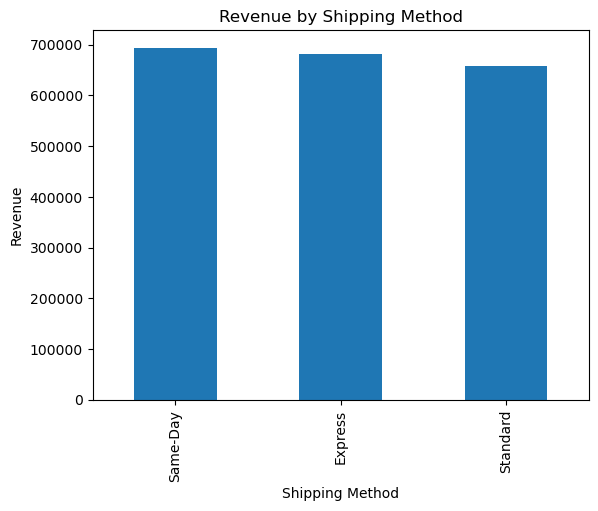

In [28]:
shipping_revenue.plot(kind="bar")
plt.title("Revenue by Shipping Method")
plt.xlabel("Shipping Method")
plt.ylabel("Revenue")
plt.show()


How healthy is the order fulfillment process?

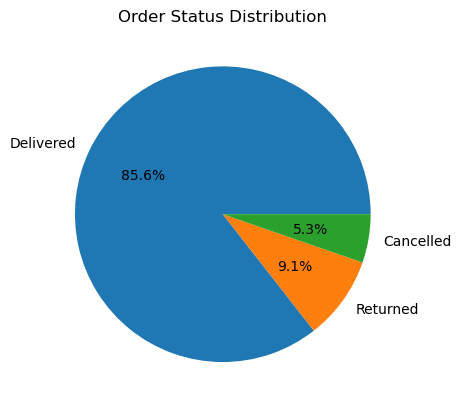

In [29]:
order_status_counts = df["order_status"].value_counts()

order_status_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Order Status Distribution")
plt.ylabel("")
plt.show()


Which categories have the highest return rates?

In [31]:
return_rate = (
    df.assign(is_returned=df["order_status"] == "Returned")
    .groupby("product_category")["is_returned"]
    .mean() * 100
)

return_rate.sort_values(ascending=False)


product_category
Sportswear            9.509202
Fitness Equipment     9.437919
Health Supplements    8.132530
Electronics           7.645260
Name: is_returned, dtype: float64

Which cities contribute most to manufacturing volume?

In [32]:
df["manufacturing_city"].value_counts()

manufacturing_city
Hyderabad    1367
Pune         1315
Delhi        1009
Bengaluru     666
Chennai       338
Mumbai        305
Name: count, dtype: int64

 ## Insights from Visualizations

The visual analysis reveals that revenue is not evenly distributed across product categories, with a small number of categories contributing a significant share of total sales. This indicates that overall business performance is highly dependent on specific product segments rather than uniform demand across all offerings.

Further analysis shows that a limited set of products generates a disproportionately high amount of revenue, reflecting a Pareto (80/20) pattern. These products act as key revenue drivers and have a strong influence on overall business growth.

Order status distribution indicates that most orders are successfully delivered, suggesting healthy operational performance. However, the presence of returned and cancelled orders highlights areas where operational efficiency and customer experience can be improved.

Trend analysis of orders over time suggests fluctuations in customer demand, indicating possible seasonality or variations in purchasing behavior. This insight is important for demand forecasting and inventory planning.

Delivery time analysis shows that while most orders are delivered within an acceptable timeframe, delayed deliveries may negatively impact customer satisfaction and contribute to higher return rates.

Overall, these insights highlight opportunities to optimize product strategy, improve logistics performance, and refine pricing and discount strategies to enhance business efficiency and profitability.


##  Business Recommendations

- Revenue is concentrated in a few product categories; focus on these for growth.
- A small number of products drive most sales meaning inventory planning is critical.
- Discounts should be optimized, not maximized.
- Reducing delivery delays can help lower return rates.

## Project Summary

This notebook presents an end-to-end data analysis project covering data validation, feature engineering, visualization, and business insights.
